# Scripts de PyPlot para hacer figuras chingonas para poster

Primero, vamos a intentarlo con un experimento que tenga una actividad notoria. Aquí cargamos un archivo que contiene los datos de un experimento con actividad epiléptica. La región CA aparece muy activa varias veces en las mediciones del potencial de campo local, LFP de ahora en adelante.

In [1]:
using PyPlot
using JLD

In [2]:
muacamuaca=open("../Actividad4AP/DatosActividadEpilepticaSelectos.bin", "r")
formaarray=(64,64,5001)
DatosExperimentales=read(muacamuaca, Float64, formaarray);
close(muacamuaca)

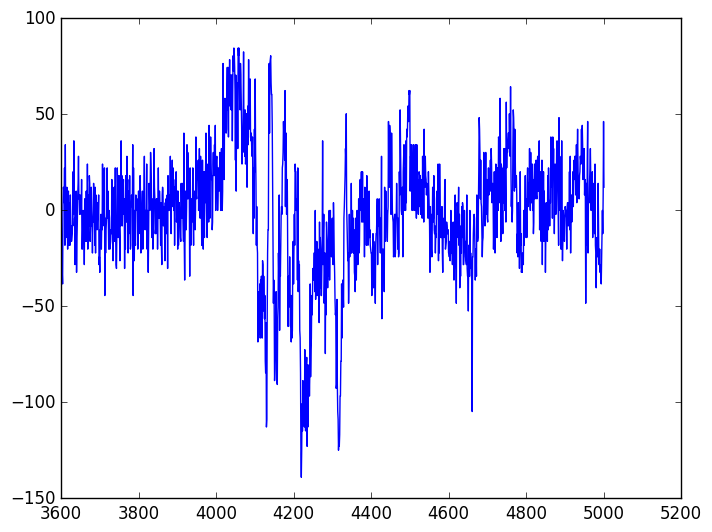

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd6a0331dd8>

In [3]:
#No todos los datos son interesantes
ion()
intervalo=3600:5001
plot(intervalo, vec(DatosExperimentales[52,40,intervalo]))

Por consistencia, vamos a transponer todos los datos para que las imagenes coincidan con las de Franco

In [4]:
DatosExperimentales=DatosExperimentales[:,:,intervalo];
(alto,ancho,tmax)=size(DatosExperimentales)
map!(x-> abs(x)>1750? 0: x, DatosExperimentales);

In [5]:
for t=1:tmax
    DatosExperimentales[:,:,t]=transpose(DatosExperimentales[:,:,t])
end

In [6]:
function ListaPixelesdeLinea(x::Array, y::Array)
    #obtener una lista de pixeles/electrodos a lo largo de una linea con dos endpoints enteros.
    #Se ponen las dos coordenadas x en un arreglo y las dos y en otro-
    xuno, xdos=x[1], x[2]
    yuno, ydos=y[1],y[2]
    if abs(xuno-xdos)>= abs(yuno-ydos)

        longitud=abs(xuno-xdos)
        m=(ydos-yuno)/(xdos-xuno)
        xresult=collect(xuno:xdos) #asumimos que el xdos es el grande!
        yresult=zeros(Int, longitud+1)
        for j in 1:longitud+1
            yresult[j]=round(Int,yuno+(j-1)*m)
        end
    else
        
        longitud=abs(yuno-ydos)
        m=(xdos-xuno)/(ydos-yuno)
        yresult=collect(yuno:ydos) #asumimos que el ydos es el grande!
        xresult=zeros(Int, longitud+1)
    for j in 1:longitud+1
        xresult[j]=round(Int,xuno+(j-1)*m)
    end
   
    end
        
    return (xresult,yresult)
end

ListaPixelesdeLinea (generic function with 1 method)

In [7]:
dobleprimax=[44,48,52,54,58, 63]
dobleprimay=[38,42,45,47,50, 54]
dobleprimal=["F''","E''", "D''", "C''", "B''","A''"];
primax=[32, 32, 32, 32, 32, 32]
primay=[43,47,51,55,59,63]
primal=["F'","E'", "D'", "C'", "B'","A'"];
puntox=[44,48,52,55,58,62]
puntoy=[38,36,34,32,30,28]
puntol=["F","E", "D", "C", "B","A"];

In [9]:
muchasx,muchasy=ListaPixelesdeLinea([puntox[1],puntox[end]],[puntoy[1],puntoy[end]])
size(muchasx)

(19,)

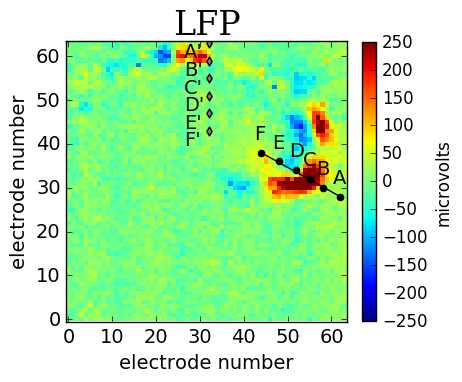

PyObject <matplotlib.text.Text object at 0x7fd6a021de10>

In [10]:
figure(figsize=(4.0,3.66))
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>24)

title("LFP", fontdict=font1)
limites=250
PyPlot.xlim(-0.5,63.5)
PyPlot.ylim(-0.5,63.5)

tau=550

for punto in 1:6
    annotate(puntol[punto], (puntox[punto], puntoy[punto]), xytext=(-5,10), textcoords="offset points", fontsize=14)
    annotate(primal[punto], (primax[punto], primay[punto]-2), xytext=(-18,-4), textcoords="offset points", fontsize=14)
    #annotate(dobleprimal[punto], (dobleprimax[punto], dobleprimay[punto]), xytext=(-18,-4), 
    # textcoords="offset points", fontsize=14)
end
imagen=imshow((DatosExperimentales[:,:,tau]), 
interpolation="none", cmap="jet", origin="lower", vmin=-limites, vmax=limites)
tick_params(axis="both", labelsize=14)

scatter(puntox,puntoy, marker="o", s=20, c="black")
scatter(primax,primay, marker="d", s=20, c="grey")
#scatter(dobleprimax,dobleprimay, marker="s", s=20, c="grey")


plot([puntox[1], puntox[end]], [puntoy[1], puntoy[end]], "k-")

cbx=colorbar(imagen, fraction=0.045) 
cbx[:set_label]("microvolts")
tick_params(axis="both", labelsize=14)

xlabel("electrode number", fontsize=14)
ylabel("electrode number", fontsize=14)

#savefig("LFP_ForDiagram_$tau_01.svg", dpi=90)

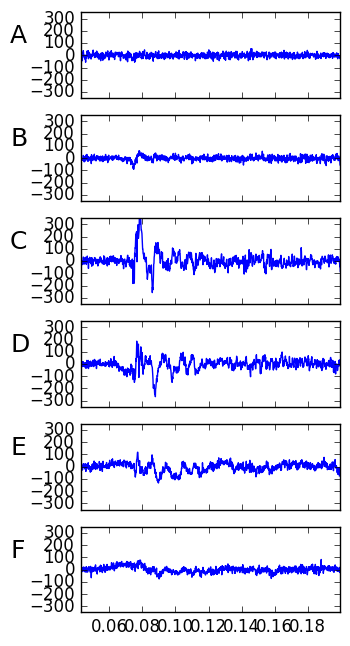

In [10]:
tiempo=1:tmax
t=700

farofa, lista=subplots(6, sharex=true, sharey=true, figsize=(3.35,6*1.25))

for j=1:6
    PyPlot.xlim(300/7022,tmax/7022)
    PyPlot.ylim(-350,350)
    lista[j][:plot](tiempo/7022,vec(DatosExperimentales[puntoy[7-j],puntox[7-j],tiempo]))
    lista[j][:annotate](puntol[7-j],xy=(0.0,100), annotation_clip=false, fontsize=18)
end

#savefig("LFP_A-F_Points_01.svg",dpi=90)

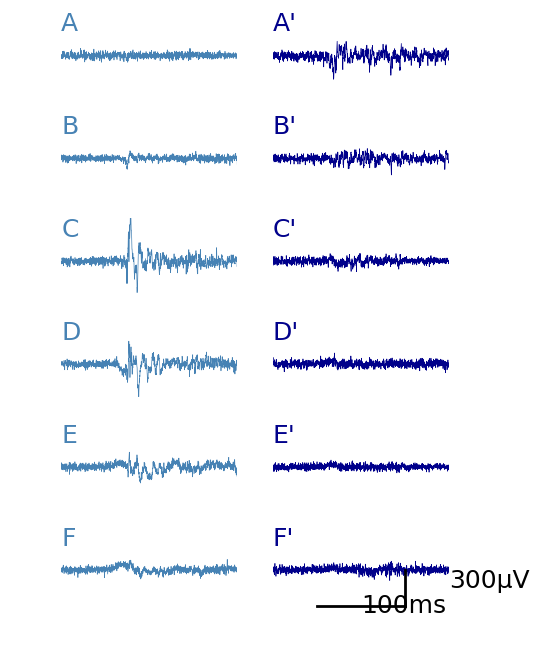

PyObject <matplotlib.text.Annotation object at 0x7f0162230b00>

In [11]:
tiempo=1:tmax
t=700

farofa, lista=subplots(6,2, sharex=true, sharey=true, figsize=(5,6*1.25))

for j=1:6
    PyPlot.xlim(1/7022,tmax/7022)
    PyPlot.ylim(-350,350)
    lista[j,1][:plot](tiempo/7022,vec(DatosExperimentales[puntoy[7-j],puntox[7-j],tiempo]), color="steelblue", lw=0.5)
    lista[j,1][:annotate](puntol[7-j],xy=(0.0,200), annotation_clip=false, fontsize=18,color="steelblue")
    lista[j,1][:axis]("off")
    
    lista[j,2][:plot](tiempo/7022,vec(DatosExperimentales[primay[7-j],primax[7-j],tiempo]),lw=0.5, color="darkblue")
    lista[j,2][:annotate](primal[7-j],xy=(0.00,200), annotation_clip=false, fontsize=18,color="darkblue")
    lista[j,2][:axis]("off")
    
  #  lista[j,3][:plot](tiempo/7022,vec(DatosExperimentales[dobleprimay[7-j],dobleprimax[7-j],tiempo]))
  #  lista[j,3][:annotate](dobleprimal[7-j],xy=(0.0,200), annotation_clip=false, fontsize=18)
end

lista[6,2][:plot]([0.05,0.15],[-300,-300], color="black", lw=2)
lista[6,2][:plot]([0.15,0.15],[-300,0], color="black", lw=2)
lista[6,2][:annotate]("300µV", xy=(0.20,-150),annotation_clip=false, fontsize=18)
lista[6,2][:annotate]("100ms", xy=(0.1,-350),annotation_clip=false, fontsize=18)
#savefig("LFP_A-F_yOtros_Points_01.svg",dpi=90)

In [12]:
xs=[puntox[1],puntox[end]]
ys=[puntoy[1],puntoy[end]]
(xxs,yys)=ListaPixelesdeLinea(xs,ys);


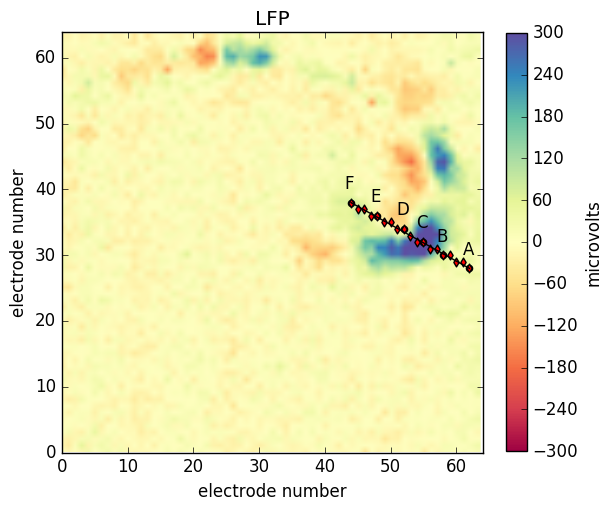

PyObject <matplotlib.text.Text object at 0x7f016270cf98>

In [24]:
figure(figsize=(6,6.0))
title("LFP")
limites=300
PyPlot.xlim(0,64)
PyPlot.ylim(0,64)

for punto in 1:6
    annotate(puntol[punto], (puntox[punto], puntoy[punto]), xytext=(-5,10), textcoords="offset points")
end
imagen=imshow((DatosExperimentales[:,:,550]), cmap="Spectral", origin="lower", vmin=-limites, vmax=limites)

scatter(puntox,puntoy, marker="o", s=20, c="black")
scatter(xxs,yys, marker="d", s=20, c="r")

plot([puntox[1], puntox[end]], [puntoy[1], puntoy[end]], "k-")

cbx=colorbar(imagen, fraction=0.045) 
cbx[:set_label]("microvolts")
xlabel("electrode number")
ylabel("electrode number")

#savefig("LFP_Recorded_350_with_selected_electrodes_01.png", dpi=90)

In [51]:
arregloparacascada=zeros(length(xxs),tmax);
for j in 1:length(xxs)
    arregloparacascada[j,:]=DatosExperimentales[yys[j],xxs[j],1:tmax]
end
#writedlm("LFP_spaciotemporal_01.dat", transpose(arregloparacascada))

In [18]:
tmax=1300
onsetofattack=349
CSD=load("CSD4APForPaperTotal.jld", "CSD")
CSDPlanchado=load("CSD4APForPaperTotal.jld", "CSDPlanchada");

In [53]:
#Tambien un arreglo para cascada del CSD
arregloparacascadacsd=zeros(arregloparacascada)
for j in 1:length(xxs)
    arregloparacascadacsd[j,:]=CSDPlanchado[yys[j],xxs[j],1:tmax]
end
writedlm("CSDPlanchado_spaciotemporal_01.dat", transpose(arregloparacascada))

In [54]:
size(arregloparacascadacsd)

(19,1300)

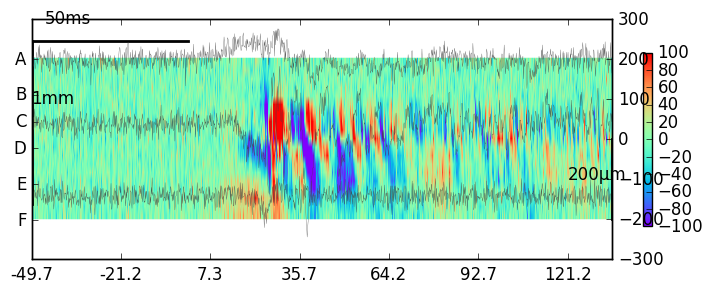

In [55]:
limites=100
fag, gaf=subplots(figsize=(8,3))
#The density plot
gaf[:set_xlim](1,1300)
gaf[:set_ylim](1,19)
imagen=gaf[:imshow](arregloparacascada, cmap="rainbow", 
vmin=-limites, vmax=limites, origin="lower", extent=[1,1300,1,19])

tiempoestampas=gaf[:axes][:get_xticks]()
gaf[:plot]([0,351],[21,21], "k-", lw=2)
gaf[:annotate]("50ms", (30.5,23))
gaf[:plot]([1,1],[2.73,21], "k-", lw=2)
gaf[:annotate]("1mm", (0,14))

#Some vertical lines
#=
gaf[:plot]([onsetofattack,onsetofattack],[22,0], "k-", lw=3)
gaf[:plot]([400,400],[22,0], "k-", lw=3)
gaf[:plot]([500,500],[22,0], "k-", lw=3)
gaf[:plot]([700,700],[22,0], "k-", lw=3)
gaf[:plot]([800,800],[22,0], "k-", lw=3)
gaf[:plot]([900,900],[22,0], "k-", lw=3)

gaf[:annotate]("0", (onsetofattack,23))
gaf[:annotate]("14", (400,23))
gaf[:annotate]("28", (500,23))
gaf[:annotate]("42", (700,23))
gaf[:annotate]("58", (800,23))
gaf[:annotate]("72", (900,23))

=#
map!(x->round((x-onsetofattack)/7.0224,1), tiempoestampas)
gaf[:axes][:set_xticklabels](tiempoestampas)

gaf[:set_yticks](puntox-puntox[1]+1)
gaf[:set_yticklabels](puntol)


#adjust aspcet ratioo
gaf[:axes][:set_aspect](20)

#colorbar
cbx=colorbar(imagen, fraction=0.014)

#the traces over the plot
ga2 = gaf[:twinx]()
ga2[:set_ylim](-300,300)

#ga2[:plot](1:1300, vec(arregloparacascada[19,1:1300])-200, "-", linewidth=0.2, color="0.25")
ga2[:plot](1:1300, vec(arregloparacascada[16,1:1300])-140, "-", linewidth=0.2, color="0.25")
#ga2[:plot](1:1300, vec(arregloparacascada[12,1:1300])-20, "-", linewidth=0.2 , color="0.25")
ga2[:plot](1:1300, vec(arregloparacascada[8,1:1300])+40, "-", linewidth=0.2, color="0.25")
#ga2[:plot](1:1300, vec(arregloparacascada[4,1:1300])+120, "-", linewidth=0.2, color="0.25")
ga2[:plot](1:1300, vec(arregloparacascada[1,1:1300])+200, "-", linewidth=0.2,color="0.25")
ga2[:plot]([1300,1300],[-200,0], "k-", lw=2)
ga2[:annotate]("200µm", (1200,-100))


ga2[:set_xlim](1,1300)
#ga2[:set_ylim](-300,300)

savefig("LFPRainbow-AF_timespaceBarras03.svg", dpi=90)

In [56]:
#savefig("LFPRainbow-AF_timespaceTest01.svg", dpi=90)
gaf=0
fag=0
tiempoestampas=0
profundidadestampas=0
close()

In [83]:
otroxs=[primax[1],primax[end]]
otroys=[primay[1],primay[end]]
(otrosxxs,otrosyys)=ListaPixelesdeLinea(otroxs,otroys);b

In [86]:
#Tambien un arreglo para cascada del CSD
otroarregloparacascadacsd=zeros(arregloparacascada)
for j in 1:length(xxs)
    otroarregloparacascadacsd[j,:]=CSDPlanchado[otrosyys[j],otrosxxs[j],1:tmax]
end

tmax

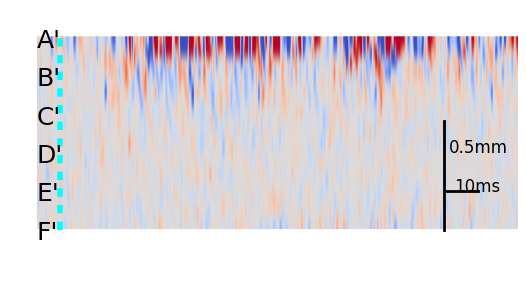

In [94]:
figure(figsize=(8,3))
limites=30
xlim(-onsetofattack+300,tmax-onsetofattack)
imagen=imshow(otroarregloparacascadacsd, cmap="coolwarm", interpolation="bicubic", 
extent=[-onsetofattack,tmax-onsetofattack,primay[1],primay[end]], origin="lower", vmin=-limites,vmax=limites)
imagen[:axes][:set_aspect](20)


#tick_params(axis="both", right="off", labelleft="off", labelbottom="off")
for y in 1:6
    annotate(primal[y], xy=(-onsetofattack+300,primay[y]-1), annotation_clip=false, fontsize=18)
end


axis("off")


#plot([2,37.1],[21,21], "k-", lw=2)
#annotate("5ms", (20.5,23))
plot([800,800],[primay[1],primay[1]+11.3], "k-", lw=2, clip_on="False")
annotate("0.5mm", (810,primay[3]))

plot([802,870.22],[primay[2],primay[2]], "k-", lw=2)
annotate("10ms", (820.5,primay[2]))

plot([0,0],[primay[1],primay[end]], lw=4,ls="--",color="cyan")

savefig("CSD4APPrimadaEspacioTemporal02.svg", dpi=90)

In [90]:
function pitagoras(x1,y1,x2,y2)
    return sqrt((x1-x2)^2+(y1-y2)^2)
end

pitagoras (generic function with 1 method)

In [91]:
pitagoras(primax[1],primay[1],primax[end],primay[end])*42

840.0

In [92]:
500*19/840

11.30952380952381

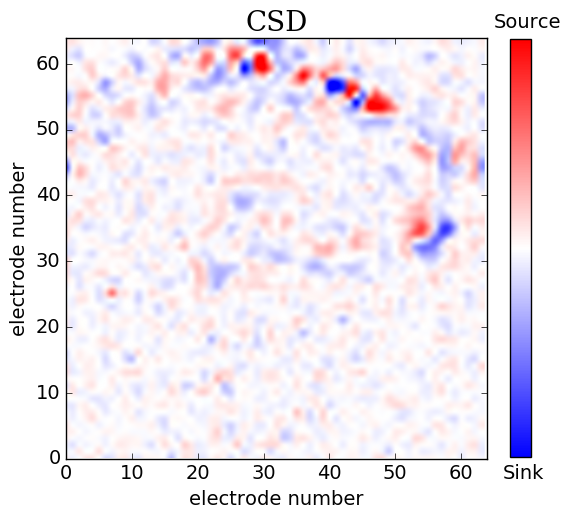

false

In [96]:
PyPlot.ion()
#################
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>20)


t=850
seg=round(t/7022, 4)
titulo="$seg s"
figure(figsize=(6,5.5))
PyPlot.xlim(0,64)
PyPlot.ylim(0,64)
#tick_params(labelbottom="off", labelleft="off")
otraimagen=imshow(CSDPlanchado[:,:,t], cmap="bwr", interpolation="spline16", origin="lower", vmin=-50, vmax=50)
#cb=colorbar(otraimagen)
#cb=colorbar(otraimagen, ticks=[-150, +150],fraction=0.046, pad=0.04, use_gridspace='True')
cb=colorbar(otraimagen, ticks=[-150, +150], use_gridspec="True",fraction=0.045 )
#farofa=cb[:set_ticklabels]([{"Sink"}, {"Source"}])
#xlabel("furufu", fontdict=font1)
tick_params(axis="both", labelsize=14)
#contour(0:63, 0:63, CSDPlanchada[:,:,t], levels=[-1,1])


annotate("Sink",
    xy=[1.07;-0.09],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=14.0,
    ha="left",
    va="bottom")

annotate("Source",
    xy=[1.05;0.98],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=14,
    ha="left",
   va="bottom")

xlabel("electrode number", fontsize=14)

ylabel("electrode number", fontsize=14)

title("CSD", fontdict=font1)

#savefig("CSDPlanchada-$t.eps", dpi=90)

#tight_layout()

PyPlot.close_queued_figs()

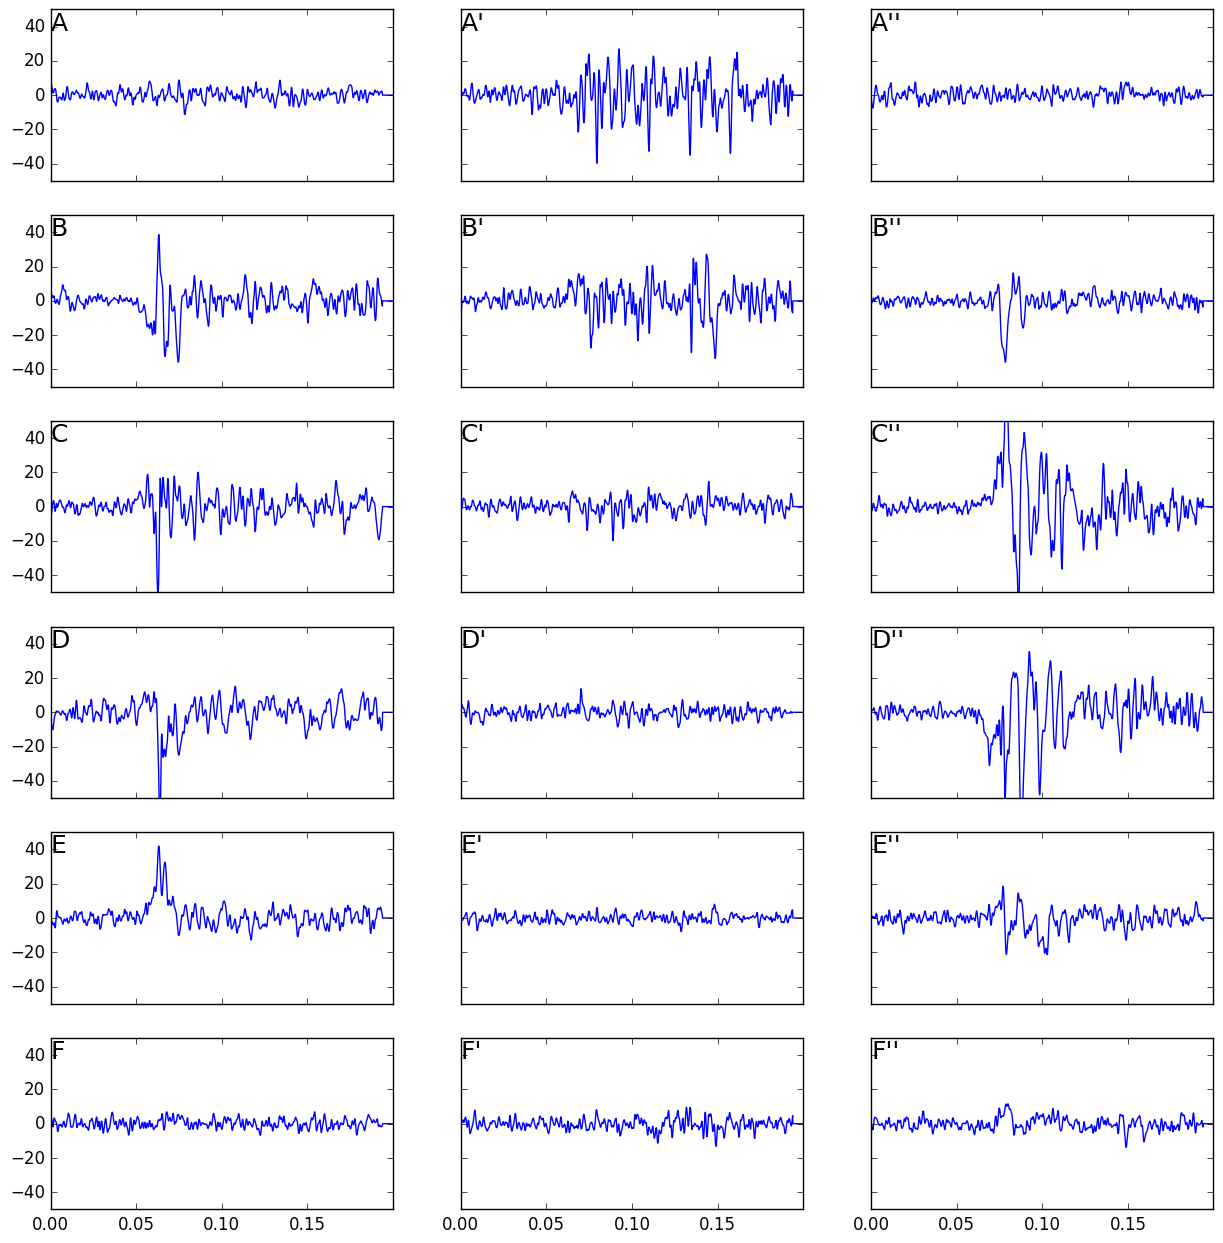

In [52]:
tiempo=1:tmax
t=700


farofa, lista=subplots(6,3, sharex=true, sharey=true, figsize=(15,6*2.5), frameon="false")

for j=1:6
    PyPlot.xlim(1/7022,tmax/7022)
    PyPlot.ylim(-50,50)
    lista[j,1][:plot](tiempo/7022,vec(CSDPlanchada[puntoy[7-j],puntox[7-j],tiempo]))
    lista[j,1][:annotate](puntol[7-j],xy=(0.0,38), annotation_clip=false, fontsize=18)
    
    lista[j,2][:plot](tiempo/7022,vec(CSDPlanchada[primay[7-j],primax[7-j],tiempo]))
    lista[j,2][:annotate](primal[7-j],xy=(0.00,38), annotation_clip=false, fontsize=18)
    
    lista[j,3][:plot](tiempo/7022,vec(CSDPlanchada[dobleprimay[7-j],dobleprimax[7-j],tiempo]))
    lista[j,3][:annotate](dobleprimal[7-j],xy=(0.0,38), annotation_clip=false, fontsize=18)
end

savefig("CSD_A-F_yOtros_Points_01.svg",dpi=90)

In [52]:
function vecindad8(punto::Array)
    j=punto[1]
    k=punto[2]
    result=Set{Array{Int64,1}}()
    push!(result, [j-1,k-1])
    push!(result, [j-1,k])
    push!(result, [j-1,k+1])
    push!(result, [j,k-1])
    push!(result, [j,k+1])
    push!(result, [j+1,k-1])
    push!(result, [j+1,k])
    push!(result, [j+1,k+1])
    return result
end

function DropPeques(data)
    #solo funciona con data de dos indices.
    renglones,colus=size(data)
    prom=mean(abs(data[3]))
    result=zeros(1,colus)
    for k=1:renglones
        if abs(data[k,3])>prom
            result=vcat(result,data[k,:])
        end
    end
    return result
end

DropPeques (generic function with 1 method)

In [53]:
function ObtenComponentesYEscribe(Datos::Array, tini=1, tfini=tmax)

 for t=tini:tfini
    #iniciar variables vacias
    ActividadNegativa=Array{Int16}[]
    ActividadPositiva=Array{Int16}[]
    SpikeCountPositivo=zeros(64,64)
    SpikeCountNegativo=zeros(64,64)
    #Todos
    for j=1:64, k=1:64
            if(Datos[j,k,t]<-0.0)     
            push!(ActividadNegativa, [j, k])
            SpikeCountNegativo[j,k]+=1
                elseif(Datos[j,k,t]>0.0)
            push!(ActividadPositiva, [j, k])
            SpikeCountPositivo[j,k]+=1
        end             
    end

    #Simple pass method
    listaneg=copy(ActividadNegativa)
    listapos=copy(ActividadPositiva)
    componentesneg=Set{Any}()
    componentespos=Set{Any}()
    #Primero lo negativo (pozos)
    while(length(listaneg)!=0)
        x=pop!(listaneg) #arranca el ULTIMO elemento de la lista
        listaprofundeza=Array{Int64}[]
        componentecurlab=Array{Int64}[]
        push!(listaprofundeza, x) #Pone elementos al FINAL de la lista
        push!(componentecurlab, x)    
        profundidad=0
        while ((length(listaprofundeza)!=0) && profundidad<100)
            y=pop!(listaprofundeza)
            for v in vecindad8(y)
                if in(v, listaneg)
             #   
                        deleteat!(listaneg, indexin(Any[v], listaneg))
                    push!(listaprofundeza, v)
                    profundidad+=1
                    push!(componentecurlab, v)
                end
            end
        end
    # println("Para ", x, "la profundidad fue ", profundidad)
        
        push!(componentesneg, componentecurlab)
    end


    centrosdemasaneg=[[0 0 0];]
    for p in componentesneg
        masa=0.00
        x=0.00
        y=0.00
        for q in p
            j=q[1]
            k=q[2]
                masalocal=Datos[j,k,t]
            masa+=masalocal
            x+=k*masalocal
            y+=j*masalocal
        end
        x/=masa
        y/=masa
        A=[x y masa]
        centrosdemasaneg=vcat(centrosdemasaneg, A)
    end
    centrosdemasaneg=centrosdemasaneg[2:end,:]
    zacatlan="GarbageCollector/CMPozos-$t.dat"
    writedlm(zacatlan, centrosdemasaneg)
    ##### Ahora lo posittivo (fuentes)
    while(length(listapos)!=0)
        x=pop!(listapos) #arranca el ULTIMO elemento de la lista
        listaprofundeza=Array{Int64}[]
        componentecurlab=Array{Int64}[]
        push!(listaprofundeza, x) #Pone elementos al FINAL de la lista
        push!(componentecurlab, x)    
        profundidad=0
        while ((length(listaprofundeza)!=0) && profundidad<100)
            y=pop!(listaprofundeza)
            for v in vecindad8(y)
                if in(v, listapos)
             #   
                        deleteat!(listapos, indexin(Any[v], listapos))
                    push!(listaprofundeza, v)
                    profundidad+=1
                    push!(componentecurlab, v)
                end
            end
        end
    # println("Para ", x, "la profundidad fue ", profundidad)
        
        push!(componentespos, componentecurlab)
    end


    centrosdemasapos=[[0 0 0];]
    for p in componentespos
        masa=0.00
        x=0.00
        y=0.00
        for q in p
            j=q[1]
            k=q[2]
                masalocal=Datos[j,k,t]
            masa+=masalocal
            x+=k*masalocal
            y+=j*masalocal
        end
        x/=masa
        y/=masa
        A=[x y masa]
        centrosdemasapos=vcat(centrosdemasapos, A)
    end
    centrosdemasapos=centrosdemasapos[2:end,:]
    zacatlan="GarbageCollector/CMFuentes-$t.dat"
    writedlm(zacatlan, centrosdemasapos)
end
    return curlab
end

ObtenComponentesYEscribe (generic function with 3 methods)

In [50]:
size(CSDPlanchada)

(64,64,1402)

In [ ]:
ObtenComponentesYEscribe(CSDPlanchada, 1, 1402)

In [57]:
t=550
EjemploCentrosCSDPos=readdlm("GarbageCollector/CentrosDeMasaParaPoster/CMFuentes-550.dat")
EjemploCentrosCSDPos=DropPeques(EjemploCentrosCSDPos)
xxpos=EjemploCentrosCSDPos[:,1]
yypos=EjemploCentrosCSDPos[:,2]
valorpos=EjemploCentrosCSDPos[:,3]
EjemploCentrosCSDNeg=readdlm("GarbageCollector/CentrosDeMasaParaPoster/CMPozos-550.dat")
EjemploCentrosCSDNeg=DropPeques(EjemploCentrosCSDNeg)
xxneg=EjemploCentrosCSDNeg[:,1]
yyneg=EjemploCentrosCSDNeg[:,2]
valorneg=EjemploCentrosCSDNeg[:,3];
CSDEjemplo=CSDPlanchada[:,:,550];

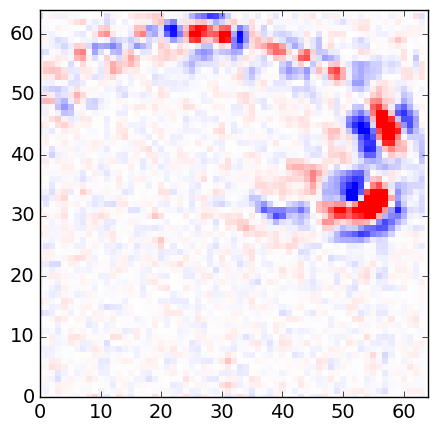

false

In [63]:
PyPlot.ion()
#################
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>20)
seg=round(t/7022, 4)
titulo="$seg s"
figure(figsize=(5,5))
PyPlot.xlim(0,64)
PyPlot.ylim(0,64)

otraimagen=imshow(CSDEjemplo, cmap="bwr", origin="lower", vmin=-50, vmax=50, interpolation="none")
#cb=colorbar(otraimagen)
#cb=colorbar(otraimagen, ticks=[-150, +150],fraction=0.046, pad=0.04, use_gridspace='True')
#cb=colorbar(otraimagen, ticks=[-150, +150], use_gridspec="True")
#farofa=cb[:set_ticklabels]([{"Sink"}, {"Source"}])
#xlabel("furufu", fontdict=font1)

#scatter(xxpos,yypos, s=valorpos, alpha=0.4, c="r", edgecolors="none")
#scatter(xxneg, yyneg, s=abs(valorneg), alpha=0.4, c="g", edgecolors="none")
#scatter(xxpos,yypos, s=0.02*valorpos, alpha=0.9, c="yellow", edgecolors="black")
#scatter(xxneg, yyneg,s=0.02*abs(valorneg), alpha=0.9, c="green", edgecolors="black")

tick_params(axis="both", labelsize=14)

#title(titulo, fontdict=font1)
 #tight_layout()
savefig("CSDParaDisjoint-550.svg", dpi=90)
PyPlot.close_queued_figs()

In [64]:
writedlm("CSDForLineArtAbove-550.dat", CSDEjemplo)

In [56]:
PyPlot.ioff()
#################
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>20)


for t=300:100:900

seg=round((t-300)/7.022, 1)
titulo="$seg ms"
figure(figsize=(6,5.5))
PyPlot.xlim(0,64)
PyPlot.ylim(0,64)
#tick_params(labelbottom="off", labelleft="off")
otraimagen=imshow(CSDPlanchada[:,:,t], cmap="bwr", interpolation="spline16", origin="lower", vmin=-50, vmax=50)
#cb=colorbar(otraimagen)
#cb=colorbar(otraimagen, ticks=[-150, +150],fraction=0.046, pad=0.04, use_gridspace='True')
cb=colorbar(otraimagen, ticks=[-150, +150], use_gridspec="True",fraction=0.045 )
#farofa=cb[:set_ticklabels]([{"Sink"}, {"Source"}])
#xlabel("furufu", fontdict=font1)
tick_params(axis="both", labelsize=14)
#contour(0:63, 0:63, CSDPlanchada[:,:,t], levels=[-1,1])


annotate("Sink",
    xy=[1.07;-0.09],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=14.0,
    ha="left",
    va="bottom")

annotate("Source",
    xy=[1.05;0.98],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=14,
    ha="left",
   va="bottom")

xlabel("electrode number", fontsize=14)

ylabel("electrode number", fontsize=14)

    title(titulo, fontdict=font1)

    savefig("CSDPlanchadaSinLabels-$t.svg", dpi=90)

end
#tight_layout()

PyPlot.close_queued_figs()